### Dijkstra's algorithm vs. Breadth-First Search
##### Breadth-First Search (BFS)
Because BFS algorithms are implemented on unweighted graphs, the algorithm will select a path with the least number of edges. Thus, the minimal runtime for a BFS solution is $O(number of edges)$. Keeping a queue and adding a node to that queue takes contstant time, $O(1)$. For all nodes, this takes $O(number of nodes)$. The $O$ notation for BFS is $O(V+E)$, where 'E' is the number of edges and 'V' is the number of vertices.
##### Dijkstra's Algorithm
Dijkstra's algorithm is implemented for finding optimal solutions in a weighted graph. In this example, it calculates the shortest path between NY and LA and selects the path with the least cost (distance). The $O$ notation for Dijkstra's algorithm is $O(ElogV)$, where 'E' is the total number of edges and 'V' is the total number of vertices.

In [29]:
import networkx  as nx # Networkx is used to depict the graphs
# See https://networkx.github.io/ for details
import matplotlib.pyplot as plt
G = nx.Graph()

Create graph of possible routes from NY to LA

In [30]:
# Create graph
trip = nx.Graph()
# Add nodes
G.add_nodes_from(['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas',
          'Indianapolis', 'Kansas City', 'Denver', 'Pittsburg', 
          'Cincinnati', 'St Louis', 'Oklahoma City' 'Salt Lake City',
          'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles'])

In [39]:
# Add edges with their weights (distance in hours)
trip.add_edge('NYC', 'DC', weight=2)
trip.add_edge('DC', 'Atlanta', weight=2)
trip.add_edge('Atlanta', 'New Orleans', weight=2)
trip.add_edge('New Orleans', 'Dallas', weight=2)
trip.add_edge('Dallas', 'Alburquerque', weight=2)
trip.add_edge('Alburquerque', 'Phoenix', weight=2)
trip.add_edge('NYC', 'Indianapolis', weight=11)
trip.add_edge('Indianapolis', 'Kansas City', weight=8)
trip.add_edge('Kansas City', 'Denver', weight=7)
trip.add_edge('Denver', 'Salt Lake City', weight=6)
trip.add_edge('Salt Lake City', 'Las Vegas', weight=9)
trip.add_edge('NYC', 'Pittsburg', weight=7)
trip.add_edge('Pittsburg', 'Cincinnati', weight=6)
trip.add_edge('Cincinnati', 'St Louis', weight=8)
trip.add_edge('St Louis', 'Oklahoma City', weight=7)
trip.add_edge('Oklahoma City', 'Alburquerque', weight=9)
trip.add_edge('Phoenix', 'San Diego', weight=5)
trip.add_edge('Phoenix', 'Las Vegas', weight=2)
trip.add_edge('Las Vegas', 'San Diego', weight=2)
trip.add_edge('Las Vegas', 'Los Angeles', weight=5)
trip.add_edge('San Diego', 'Los Angeles', weight=2)

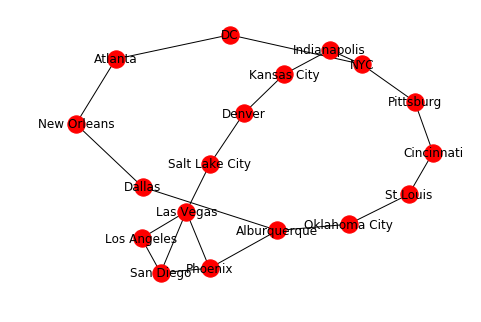

In [42]:
# Show visual of graph
nx.draw(trip, with_labels=True)
plt.show()

In [43]:
# Define starting location and destination
source = 'NYC'
dest = 'Los Angeles'

## Breadth First Search
#### Use BFS algorithm to find the most effecient path from LA to NY and the total time (use the weights assigned to the routes even though BFS works on unweighted edges)

In [44]:
# Track total distance traveled
bfs_length = 0

# Iterate through breadth-first search 
for route_start, route_stop in list(nx.bfs_edges(trip, source)):
    length = trip.get_edge_data(route_start, route_stop)['weight']
    bfs_length += length
    print('{0} -> {1} : \t{2} hours'.format(route_start, 
                                            route_stop, length))

NYC -> DC : 	2 hours
NYC -> Indianapolis : 	11 hours
NYC -> Pittsburg : 	7 hours
DC -> Atlanta : 	2 hours
Indianapolis -> Kansas City : 	8 hours
Pittsburg -> Cincinnati : 	6 hours
Atlanta -> New Orleans : 	2 hours
Kansas City -> Denver : 	7 hours
Cincinnati -> St Louis : 	8 hours
New Orleans -> Dallas : 	2 hours
Denver -> Salt Lake City : 	6 hours
St Louis -> Oklahoma City : 	7 hours
Dallas -> Alburquerque : 	2 hours
Salt Lake City -> Las Vegas : 	9 hours
Alburquerque -> Phoenix : 	2 hours
Las Vegas -> San Diego : 	2 hours
Las Vegas -> Los Angeles : 	5 hours


In [45]:
print('BFS trip length', bfs_length)

BFS trip length 88


In [46]:
# shows a tree constructed from a breadth-first search starting at source
# Unfortunately, to get to LA, the BFS needs to visit all nodes in the graph
nx.draw(nx.bfs_tree(trip, source), with_labels=True)

## Dijkstra's algorithm
#### Use Dijkstra's algorithm to find the optimal route between LA and NY and the total time (use the wieghted edges)

In [47]:
d_length = nx.dijkstra_path_length(trip, source, dest)
print('Dijkstra\'s trip length: ', d_length)

Dijkstra's trip length:  18


In [48]:
ideal_route = nx.dijkstra_path(trip, source, dest)
ideal_route

['NYC',
 'DC',
 'Atlanta',
 'New Orleans',
 'Dallas',
 'Alburquerque',
 'Phoenix',
 'Las Vegas',
 'San Diego',
 'Los Angeles']

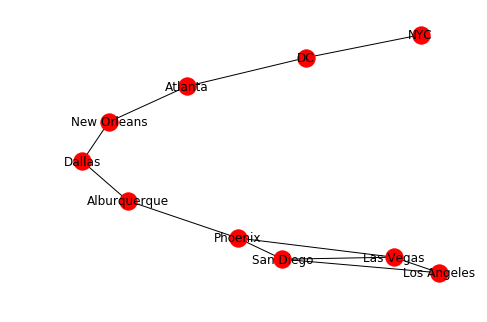

In [57]:
subgraph = nx.draw(trip.subgraph(ideal_route), with_labels=True)
plt.show(subgraph)

#### Compare BFS and Dijkstra

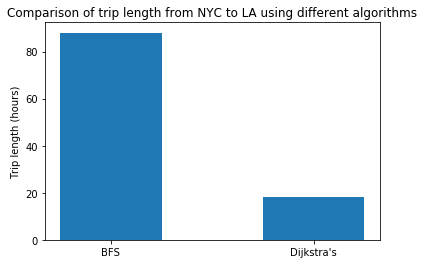

In [58]:
plt.bar([1,2], [bfs_length, d_length], width=0.5, 
        tick_label=['BFS', 'Dijkstra\'s'])
plt.ylabel('Trip length (hours)')
plt.title('Comparison of trip length from NYC to LA using different algorithms')
plt.show()